In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sms 
import numpy as np
%matplotlib inline

In [3]:
df_airline = pd.read_csv('airline_passengers.csv')

In [4]:
df_airline

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


## Data processing

**check for null values**

In [6]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [8]:
df_airline.dropna(axis=0, inplace=True)

In [11]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [13]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


**formating the date columns**

In [15]:
df_airline['Month'] = pd.to_datetime(df_airline['Month'])

In [18]:
df = df_airline.set_index('Month', drop=True)

<AxesSubplot:xlabel='Month'>

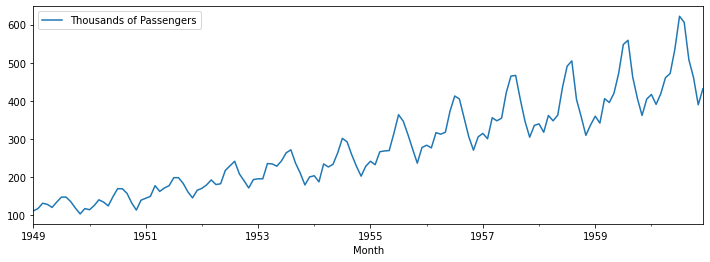

In [20]:
df.plot(figsize=(12,4))

In [27]:
df["Number_Passenger:10 days rolling"] = df['Thousands of Passengers'].rolling(window=10, min_periods=1).mean()

In [28]:
df

,Thousands of Passengers,Number_Passenger:10 days rolling
Month,,
1949-01-01,112.0,112.000000
1949-02-01,118.0,115.000000
1949-03-01,132.0,120.666667
1949-04-01,129.0,122.750000
1949-05-01,121.0,122.400000
...,...,...
1960-08-01,606.0,469.000000
1960-09-01,508.0,483.600000
1960-10-01,461.0,489.200000


<AxesSubplot:xlabel='Month'>

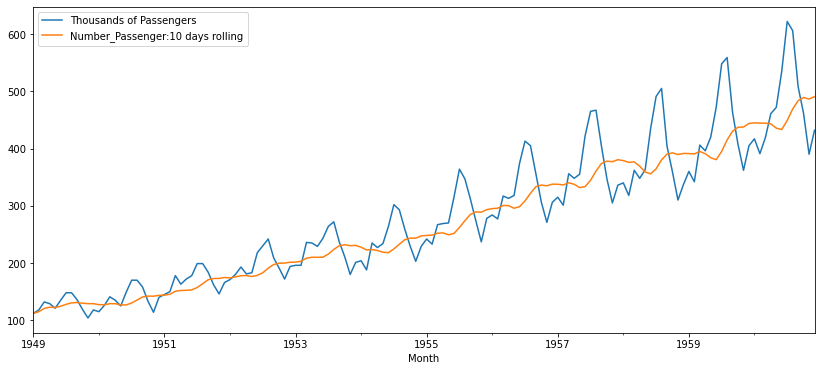

In [30]:
df[['Thousands of Passengers', 'Number_Passenger:10 days rolling']].plot(figsize=(14,6))

In [32]:
df['EWMA_5Days'] = df['Thousands of Passengers'].ewm(span=5).mean()

<AxesSubplot:xlabel='Month'>

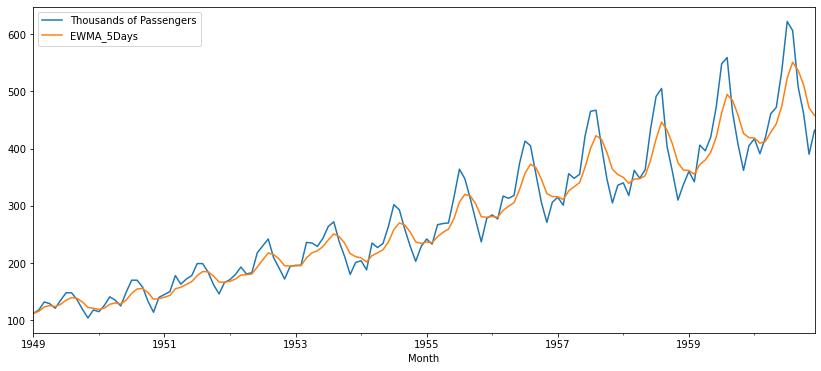

In [36]:
df[['Thousands of Passengers', 'EWMA_5Days']].plot(figsize=(14,6))

**Hypothesis testing**

In [37]:
from statsmodels.tsa.stattools import adfuller

In [38]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [39]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060512
p- value: 0.991880243437641
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


**since our data is not stationarry we will pursuit with Differencing**

**first differencing**

In [40]:
## Use Techniques Differencing
df['Passengers First Difference']=df['Thousands of Passengers']-df['Thousands of Passengers'].shift(1)

In [41]:
df

,Thousands of Passengers,Number_Passenger:10 days rolling,EWMA_5Days,Passengers First Difference
Month,,,,
1949-01-01,112.0,112.000000,112.000000,NaN
1949-02-01,118.0,115.000000,115.600000,6.0
1949-03-01,132.0,120.666667,123.368421,14.0
1949-04-01,129.0,122.750000,125.707692,-3.0
1949-05-01,121.0,122.400000,123.900474,-8.0
...,...,...,...,...
1960-08-01,606.0,469.000000,550.777689,-16.0
1960-09-01,508.0,483.600000,536.518459,-98.0
1960-10-01,461.0,489.200000,511.345640,-47.0


In [44]:
adf_test(df['Passengers First Difference'].dropna())

ADF Statistics: -2.829266824169998
p- value: 0.054213290283825676
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


**second differencing**

In [46]:
## Use Techniques Differencing
df['Passengers Second Difference']=df['Passengers First Difference']-df['Passengers First Difference'].shift(1)

In [47]:
adf_test(df['Passengers Second Difference'].dropna())

ADF Statistics: -16.384231542468516
p- value: 2.7328918500141235e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


**1y of differencing**

In [48]:
### 12 months 
## Use Techniques Differencing
df['Passengers 12 Difference']=df['Thousands of Passengers']-df['Thousands of Passengers'].shift(12)

In [49]:
adf_test(df['Passengers 12 Difference'].dropna())

ADF Statistics: -3.3830207264924805
p- value: 0.011551493085514982
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [50]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

C:\Users\asus\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


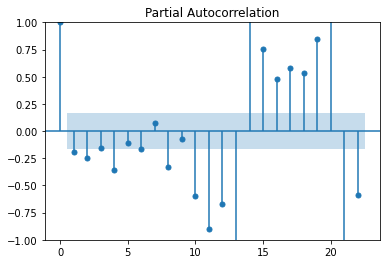

In [59]:
result = plot_pacf(df["Passengers Second Difference"].dropna())